# batch normalization이 미치는 영향

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader, TensorDataset

import matplotlib.pyplot as plt
import numpy as np
import copy

#np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [50]:
torch.manual_seed(1)

mnist_train = datasets.MNIST(root='MNIST_data/', train=True, download=True, transform=transforms.ToTensor())
mnist_test = datasets.MNIST(root='MNIST_data/', train=False, download=True, transform=transforms.ToTensor())

train_set, val_set = torch.utils.data.random_split(mnist_train,[50000,10000])

train_loader = DataLoader(dataset=train_set, batch_size=32, shuffle=False, drop_last=True)
val_loader = DataLoader(dataset=val_set, batch_size=32, shuffle=False, drop_last=True)
test_loader = DataLoader(dataset=mnist_test, batch_size=32, shuffle=False, drop_last=True)

In [51]:
linear1 = nn.Linear(784,32,bias=True)
linear2 = nn.Linear(32,32,bias=True)
linear3 = nn.Linear(32,32,bias=True)

bn_linear1 = copy.deepcopy(linear1)
bn_linear2 = copy.deepcopy(linear2)
bn_linear3 = copy.deepcopy(linear3)

class basic_model(nn.Module):
    def __init__(self):
        super(basic_model, self).__init__()
        self.fc1 = linear1
        self.fc2 = linear2
        self.fc3 = linear3
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.fc1(x)
        print(out)
        out = self.relu(out)
        print(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

class batchnorm_model(nn.Module):
    def __init__(self):
        super(batchnorm_model,self).__init__()
        self.fc1 = bn_linear1
        self.fc2 = bn_linear2 
        self.fc3 = bn_linear3
        self.relu = nn.ReLU()
        self.batch1 = nn.BatchNorm1d(32)
        self.batch2 = nn.BatchNorm1d(32)
    
    def forward(self, x):
        out = self.fc1(x)
        print(out)
        out = self.batch1(out)
        print(out)
        out = self.relu(out)
        print(out)
        out = self.fc2(out)
        out = self.batch2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

In [53]:
base_model = basic_model()

for epoch in range(1):
    for X,Y in train_loader:
        X = X.view(-1, 28*28)
        Y = Y

        base_predict = base_model(X)
        break

tensor([[-0.2773,  0.1910, -0.0604,  ..., -0.0570, -0.0295, -0.0212],
        [ 0.0277,  0.0046,  0.1436,  ...,  0.2285,  0.0544,  0.1282],
        [-0.0747,  0.0994,  0.0819,  ..., -0.0595, -0.0445,  0.1574],
        ...,
        [-0.1266, -0.0923, -0.0578,  ...,  0.2483,  0.0372,  0.0918],
        [-0.0635,  0.0516, -0.0665,  ...,  0.2948,  0.1509,  0.3686],
        [-0.0890,  0.1214, -0.1457,  ...,  0.3318,  0.1116,  0.2712]],
       grad_fn=<AddmmBackward>)
tensor([[0.0000, 0.1910, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0277, 0.0046, 0.1436,  ..., 0.2285, 0.0544, 0.1282],
        [0.0000, 0.0994, 0.0819,  ..., 0.0000, 0.0000, 0.1574],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.2483, 0.0372, 0.0918],
        [0.0000, 0.0516, 0.0000,  ..., 0.2948, 0.1509, 0.3686],
        [0.0000, 0.1214, 0.0000,  ..., 0.3318, 0.1116, 0.2712]],
       grad_fn=<ReluBackward0>)


In [54]:
bn_model = batchnorm_model()

for epoch in range(1):
    for X,Y in train_loader:
        X = X.view(-1, 28*28)
        Y = Y

        bn_model_predict = bn_model(X)
        break

tensor([[-0.2773,  0.1910, -0.0604,  ..., -0.0570, -0.0295, -0.0212],
        [ 0.0277,  0.0046,  0.1436,  ...,  0.2285,  0.0544,  0.1282],
        [-0.0747,  0.0994,  0.0819,  ..., -0.0595, -0.0445,  0.1574],
        ...,
        [-0.1266, -0.0923, -0.0578,  ...,  0.2483,  0.0372,  0.0918],
        [-0.0635,  0.0516, -0.0665,  ...,  0.2948,  0.1509,  0.3686],
        [-0.0890,  0.1214, -0.1457,  ...,  0.3318,  0.1116,  0.2712]],
       grad_fn=<AddmmBackward>)
tensor([[-1.8675,  1.2132, -0.1984,  ..., -2.1870,  0.0790, -0.5646],
        [ 0.7402, -0.3421,  1.2790,  ...,  0.4531,  0.8082,  0.5076],
        [-0.1359,  0.4484,  0.8322,  ..., -2.2098, -0.0508,  0.7178],
        ...,
        [-0.5797, -1.1509, -0.1794,  ...,  0.6363,  0.6588,  0.2464],
        [-0.0397,  0.0501, -0.2424,  ...,  1.0661,  1.6472,  2.2341],
        [-0.2577,  0.6325, -0.8163,  ...,  1.4082,  1.3057,  1.5345]],
       grad_fn=<NativeBatchNormBackward>)
tensor([[0.0000, 1.2132, 0.0000,  ..., 0.0000, 0.0790, 0.0

In [8]:
for names in base_model.state_dict():
    print(names)
    print(base_model.state_dict()[names])

for name in bn_model.state_dict():
    print(name)
    print(bn_model.state_dict()[name])

fc1.weight
tensor([[ 0.0184, -0.0158, -0.0069,  ...,  0.0068, -0.0041,  0.0025],
        [-0.0274, -0.0224, -0.0309,  ..., -0.0029,  0.0013, -0.0167],
        [ 0.0282, -0.0095, -0.0340,  ..., -0.0141,  0.0056, -0.0335],
        ...,
        [ 0.0226,  0.0331,  0.0182,  ...,  0.0150,  0.0278, -0.0073],
        [-0.0210,  0.0144,  0.0214,  ..., -0.0308, -0.0335,  0.0085],
        [ 0.0219,  0.0195, -0.0009,  ...,  0.0191,  0.0218, -0.0320]])
fc1.bias
tensor([-0.0307, -0.0337, -0.0269, -0.0182, -0.0350,  0.0134,  0.0020, -0.0210,
         0.0300, -0.0290,  0.0310,  0.0319,  0.0175,  0.0299,  0.0098, -0.0173,
         0.0081,  0.0106, -0.0235, -0.0038,  0.0250,  0.0034, -0.0303,  0.0020,
        -0.0158, -0.0134, -0.0135, -0.0273, -0.0155,  0.0288,  0.0213,  0.0234])
fc2.weight
tensor([[-0.1074, -0.1094,  0.1015,  ...,  0.0438,  0.0739,  0.1689],
        [-0.0603, -0.1082,  0.1293,  ..., -0.0461,  0.0317, -0.1180],
        [-0.1467, -0.1206,  0.0114,  ...,  0.0195,  0.0147, -0.1060],
    

# Train loss vs Test loss 비교하기

In [60]:
train_loader = DataLoader(dataset=train_set, batch_size=32, shuffle=True, drop_last=True)
val_loader = DataLoader(dataset=val_set, batch_size=32, shuffle=True, drop_last=True)
test_loader = DataLoader(dataset=mnist_test, batch_size=32, shuffle=True, drop_last=True)

class basic_model(nn.Module):
    def __init__(self):
        super(basic_model, self).__init__()
        self.fc1 = nn.Linear(784,32,bias=True)
        self.fc2 = nn.Linear(32,32,bias=True)
        self.fc3 = nn.Linear(32,32,bias=True)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.fc1(x)
        #print(out)
        out = self.relu(out)
        #print(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

class batchnorm_model(nn.Module):
    def __init__(self):
        super(batchnorm_model,self).__init__()
        self.fc1 = nn.Linear(784,32,bias=True)
        self.fc2 = nn.Linear(32,32,bias=True)
        self.fc3 = nn.Linear(32,32,bias=True)
        self.relu = nn.ReLU()
        self.batch1 = nn.BatchNorm1d(32)
        self.batch2 = nn.BatchNorm1d(32)
    
    def forward(self, x):
        out = self.fc1(x)
        #print(out)
        out = self.batch1(out)
        #print(out)
        out = self.relu(out)
        #print(out)
        out = self.fc2(out)
        out = self.batch2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

In [126]:
base_model = basic_model()
base_criterion = torch.nn.CrossEntropyLoss()
base_optimizer = optim.Adam(base_model.parameters(), lr=0.001)

# Train

base_train_iteration_loss = []
base_train_epoch_loss = []
base_valid_iteration_loss = []
base_valid_epoch_loss = []

for epoch in range(10):
    base_model.train()
    train_avg_cost = 0
    valid_avg_cost = 0

    for X,Y in train_loader:
        X = X.view(-1, 28*28)
        Y = Y

        base_optimizer.zero_grad()
        base_predict = base_model(X)
        base_loss = base_criterion(base_predict, Y)
        base_loss.backward()
        base_optimizer.step()

        base_train_iteration_loss.append(base_loss.item())
        train_avg_cost += base_loss / len(train_loader)
    
    base_train_epoch_loss.append(train_avg_cost.item())

    print('epoch: ', epoch, 'cost: ', train_avg_cost.item())

    base_model.eval()
    with torch.no_grad():
        for X,Y in val_loader:
            X = X.view(-1, 28*28)
            Y = Y

            valid_predict = base_model(X)
            valid_loss = base_criterion(valid_predict, Y)
            base_valid_iteration_loss.append(valid_loss.item())
            valid_avg_cost += valid_loss / len(val_loader)
        
        base_valid_epoch_loss.append(valid_avg_cost.item())

# Test 

base_test_iteration_loss = []
accuracy = []

base_model.eval()
with torch.no_grad():
    for X,Y in test_loader:
        X = X.view(-1, 28*28)
        Y = Y

        test_predict = base_model(X)
        test_loss = base_criterion(test_predict, Y)
        base_test_iteration_loss.append(test_loss.item())
        correct_predict = torch.argmax(test_predict, 1) == Y
        batch_accuracy = correct_predict.float().mean()
        accuracy.append(batch_accuracy.item())
    
    total_accuracy = sum(accuracy) / len(test_loader)
    print("Test accuracy: ", total_accuracy)
    

epoch:  0 cost:  0.4936293065547943
epoch:  1 cost:  0.2342904955148697
epoch:  2 cost:  0.1908544898033142
epoch:  3 cost:  0.1593146175146103
epoch:  4 cost:  0.1396663784980774
epoch:  5 cost:  0.12372688204050064
epoch:  6 cost:  0.11153756082057953
epoch:  7 cost:  0.0999181717634201
epoch:  8 cost:  0.09296746551990509
epoch:  9 cost:  0.08739970624446869
Test accuracy:  0.9603365384615384


<function matplotlib.pyplot.show(close=None, block=None)>

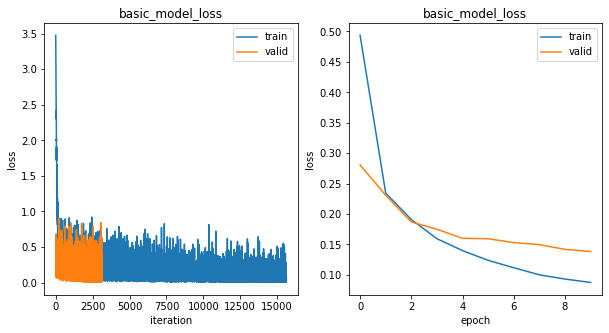

In [127]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('basic_model_loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(range(len(train_loader)*10), base_train_iteration_loss, range(len(val_loader)*10), base_valid_iteration_loss)
plt.legend(['train', 'valid'], loc = 1)
plt.subplot(1,2,2)
plt.title('basic_model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(range(10), base_train_epoch_loss, range(10), base_valid_epoch_loss)
plt.legend(['train', 'valid'], loc = 1)
plt.show

In [128]:
bn_model = batchnorm_model()
bn_criterion = torch.nn.CrossEntropyLoss()
bn_optimizer = optim.Adam(bn_model.parameters(), lr=0.001)

# Train

bn_train_iteration_loss = []
bn_train_epoch_loss = []
bn_valid_iteration_loss = []
bn_valid_epoch_loss = []

for epoch in range(10):
    bn_model.train()
    train_avg_cost = 0
    valid_avg_cost = 0

    for X,Y in train_loader:
        X = X.view(-1, 28*28)
        Y = Y

        bn_optimizer.zero_grad()
        bn_predict = bn_model(X)
        bn_loss = bn_criterion(bn_predict, Y)
        bn_loss.backward()
        bn_optimizer.step()

        bn_train_iteration_loss.append(bn_loss.item())
        train_avg_cost += bn_loss / len(train_loader)
    
    bn_train_epoch_loss.append(train_avg_cost.item())

    print('epoch: ', epoch, 'cost: ', train_avg_cost.item())

    bn_model.eval()
    with torch.no_grad():
        for X,Y in val_loader:
            X = X.view(-1, 28*28)
            Y = Y

            valid_predict = bn_model(X)
            valid_loss = bn_criterion(valid_predict, Y)
            bn_valid_iteration_loss.append(valid_loss.item())
            valid_avg_cost += valid_loss / len(val_loader)
        
        bn_valid_epoch_loss.append(valid_avg_cost.item())

bn_test_iteration_loss = []
bn_accuracy = []

# Test

bn_model.eval()
with torch.no_grad():
    for X,Y in test_loader:
        X = X.view(-1, 28*28)
        Y = Y

        test_predict = bn_model(X)
        test_loss = bn_criterion(test_predict, Y)
        bn_test_iteration_loss.append(test_loss.item())
        correct_predict = torch.argmax(test_predict, 1) == Y
        batch_accuracy = correct_predict.float().mean()
        bn_accuracy.append(batch_accuracy.item())
    
    total_accuracy = sum(bn_accuracy) / len(test_loader)
    print("accuracy: ", total_accuracy)

epoch:  0 cost:  0.43184328079223633
epoch:  1 cost:  0.1775902360677719
epoch:  2 cost:  0.14332671463489532
epoch:  3 cost:  0.12520919740200043
epoch:  4 cost:  0.1163187026977539
epoch:  5 cost:  0.10503543168306351
epoch:  6 cost:  0.09721241891384125
epoch:  7 cost:  0.09539560228586197
epoch:  8 cost:  0.08945402503013611
epoch:  9 cost:  0.0851837545633316
accuracy:  0.9710536858974359


<function matplotlib.pyplot.show(close=None, block=None)>

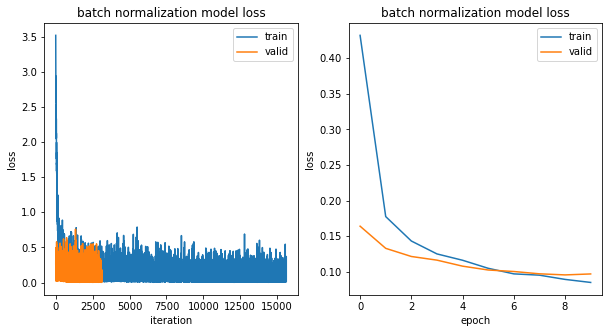

In [129]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('batch normalization model loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(range(len(train_loader)*10), bn_train_iteration_loss, range(len(val_loader)*10), bn_valid_iteration_loss)
plt.legend(['train', 'valid'], loc = 1)
plt.subplot(1,2,2)
plt.title('batch normalization model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(range(10), bn_train_epoch_loss, range(10), bn_valid_epoch_loss)
plt.legend(['train', 'valid'], loc = 1)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

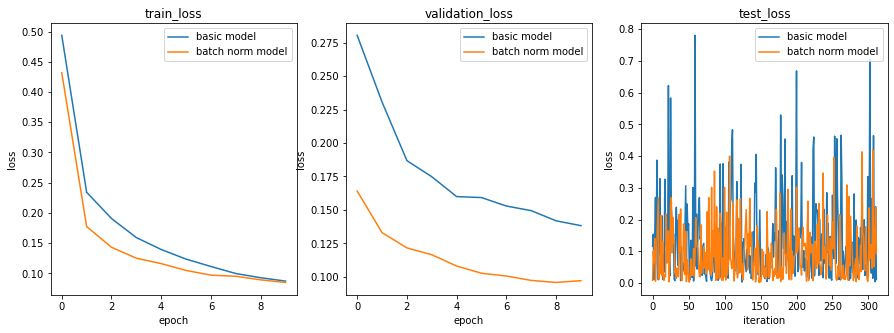

In [130]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('train_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(range(10), base_train_epoch_loss, range(10), bn_train_epoch_loss)
plt.legend(['basic model', 'batch norm model'], loc = 1)
plt.subplot(1,3,2)
plt.title('validation_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(range(10), base_valid_epoch_loss, range(10), bn_valid_epoch_loss)
plt.legend(['basic model', 'batch norm model'], loc = 1)
plt.subplot(1,3,3)
plt.title('test_loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(range(len(test_loader)), base_test_iteration_loss, range(len(test_loader)), bn_test_iteration_loss)
plt.legend(['basic model', 'batch norm model'], loc = 1)
plt.show

# 초기 Weight가 0일 때 backpropagation은 어떻게 이루어질까?

In [148]:
class zero_weight_model(nn.Module):
    def __init__(self):
        super(zero_weight_model,self).__init__()
        self.fc1 = nn.Linear(784, 10, bias=True)
        self.fc2 = nn.Linear(10, 10, bias=True)
        self.relu = nn.ReLU()

        torch.nn.init.constant_(self.fc1.weight, 0)
        torch.nn.init.constant_(self.fc1.bias, 0)
        torch.nn.init.constant_(self.fc2.weight, 0)
        torch.nn.init.constant_(self.fc2.bias, 0)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)

        return out

class linear_model(nn.Module):
    def __init__(self):
        super(linear_model, self).__init__()
        self.fc1 = nn.Linear(784, 10, bias=True)
        self.fc2 = nn.Linear(10, 10, bias=True)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)

        return out

In [154]:
zero_model = zero_weight_model()
print('weight of zero_model')
for params in zero_model.state_dict():
    print(zero_model.state_dict()[params])
    print(torch.sum(zero_model.state_dict()[params]))

standard_model = linear_model()
print('weight of standard_model')
for params in standard_model.state_dict():
    print(standard_model.state_dict()[params])

weight of zero_model
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor(0.)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor(0.)
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
tensor(0.)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor(0.)
weight of standard_model
tensor([[-0.0190, -0.0210,  0.0271,  ...,  0.0238,  0.030

<function matplotlib.pyplot.show(close=None, block=None)>

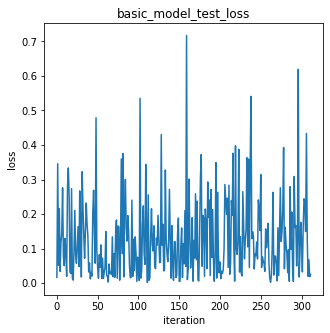

In [117]:
plt.figure(figsize=(5,5))
plt.title('basic_model_test_loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(base_test_iteration_loss)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

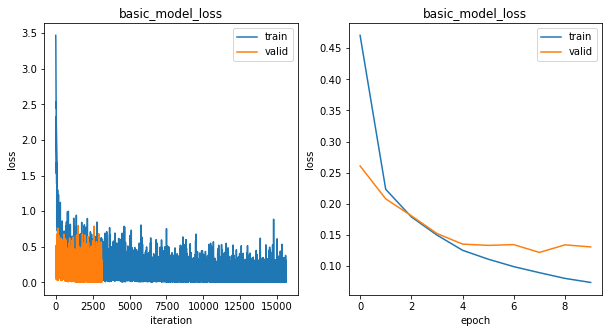

In [97]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('basic_model_loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(range(len(train_loader)*10), base_train_iteration_loss, range(len(val_loader)*10), base_valid_iteration_loss)
plt.legend(['train', 'valid'], loc = 1)
plt.subplot(1,2,2)
plt.title('basic_model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(range(10), base_train_epoch_loss, range(10), base_valid_epoch_loss)
plt.legend(['train', 'valid'], loc = 1)
plt.show

In [83]:
bn_model = batchnorm_model()
bn_criterion = torch.nn.CrossEntropyLoss()
bn_optimizer = optim.Adam(bn_model.parameters(), lr=0.001)

bn_train_iteration_loss = []
bn_train_epoch_loss = []
bn_valid_iteration_loss = []
bn_valid_epoch_loss = []

for epoch in range(10):
    bn_model.train()
    train_avg_cost = 0
    valid_avg_cost = 0

    for X,Y in train_loader:
        X = X.view(-1, 28*28)
        Y = Y

        bn_optimizer.zero_grad()
        bn_predict = bn_model(X)
        bn_loss = bn_criterion(bn_predict, Y)
        bn_loss.backward()
        bn_optimizer.step()

        bn_train_iteration_loss.append(bn_loss.item())
        train_avg_cost += bn_loss / len(train_loader)
    
    bn_train_epoch_loss.append(train_avg_cost.item())

    print('epoch: ', epoch, 'cost: ', train_avg_cost.item())

    bn_model.eval()
    with torch.no_grad():
        for X,Y in val_loader:
            X = X.view(-1, 28*28)
            Y = Y

            valid_predict = bn_model(X)
            valid_loss = bn_criterion(valid_predict, Y)
            bn_valid_iteration_loss.append(valid_loss.item())
            valid_avg_cost += valid_loss / len(val_loader)
        
        bn_valid_epoch_loss.append(valid_avg_cost.item())
    

epoch:  0 cost:  0.46017006039619446
epoch:  1 cost:  0.1793643832206726
epoch:  2 cost:  0.14715956151485443
epoch:  3 cost:  0.12764407694339752
epoch:  4 cost:  0.11396469175815582
epoch:  5 cost:  0.10561460256576538
epoch:  6 cost:  0.09850456565618515
epoch:  7 cost:  0.09395429491996765
epoch:  8 cost:  0.08735445886850357
epoch:  9 cost:  0.08461065590381622


<function matplotlib.pyplot.show(close=None, block=None)>

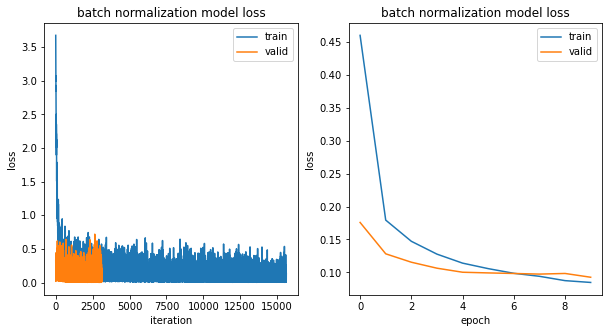

In [96]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('batch normalization model loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(range(len(train_loader)*10), bn_train_iteration_loss, range(len(val_loader)*10), bn_valid_iteration_loss)
plt.legend(['train', 'valid'], loc = 1)
plt.subplot(1,2,2)
plt.title('batch normalization model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(range(10), bn_train_epoch_loss, range(10), bn_valid_epoch_loss)
plt.legend(['train', 'valid'], loc = 1)
plt.show

In [119]:
bn_test_iteration_loss = []
bn_accuracy = []

bn_model.eval()
with torch.no_grad():
    for X,Y in test_loader:
        X = X.view(-1, 28*28)
        Y = Y

        test_predict = bn_model(X)
        test_loss = bn_criterion(test_predict, Y)
        bn_test_iteration_loss.append(test_loss.item())
        correct_predict = torch.argmax(test_predict, 1) == Y
        batch_accuracy = correct_predict.float().mean()
        bn_accuracy.append(batch_accuracy.item())
    
    total_accuracy = sum(bn_accuracy) / len(test_loader)
    print("accuracy: ", total_accuracy)

accuracy:  0.9727564102564102


<function matplotlib.pyplot.show(close=None, block=None)>

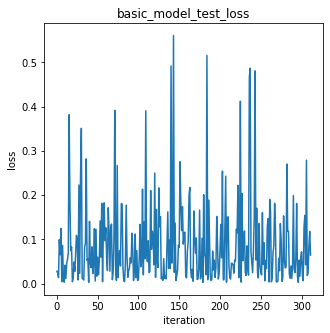

In [121]:
plt.figure(figsize=(5,5))
plt.title('basic_model_test_loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(bn_test_iteration_loss)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

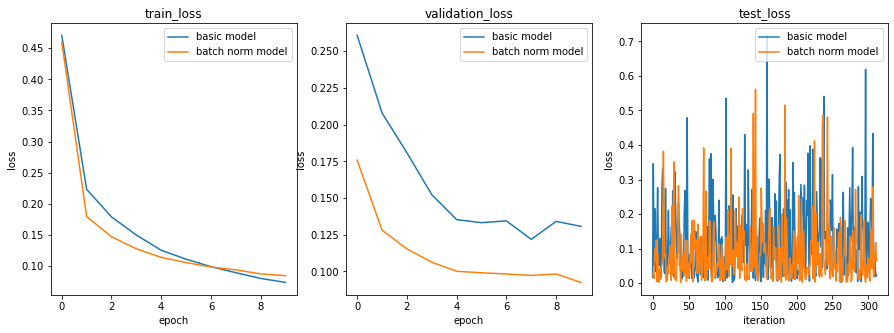

In [125]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('train_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(range(10), base_train_epoch_loss, range(10), bn_train_epoch_loss)
plt.legend(['basic model', 'batch norm model'], loc = 1)
plt.subplot(1,3,2)
plt.title('validation_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(range(10), base_valid_epoch_loss, range(10), bn_valid_epoch_loss)
plt.legend(['basic model', 'batch norm model'], loc = 1)
plt.subplot(1,3,3)
plt.title('test_loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(range(len(test_loader)), base_test_iteration_loss, range(len(test_loader)), bn_test_iteration_loss)
plt.legend(['basic model', 'batch norm model'], loc = 1)
plt.show